# Computing eigenvalues of non-self-adjoint Schr&ouml;dinger operators with FindZeros

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from sympy import *
from time import time

In [2]:
from FindZeros import FindZeros

## One barrier

The zeros in the upper and lower-half plane of the below function are the eigenvalue and resonances (resp.) of the Schr&ouml;dinger operator $ -d^2/dx^2 + i \gamma \chi_R $ on the half-line endowed with a Dirchlet boundary condition at 0:
$$
f_R(z) = i \sqrt{z} \sin ( \sqrt{z - i \gamma} R ) - \sqrt{z - i \gamma } \cos ( \sqrt{z - i \gamma } R ).
$$

In [3]:
gam = 1
R = 4.7
z = symbols('z')
fexpr = (1j*sqrt(z)*sin(sqrt(z - 1j*gam)*R) - sqrt(z - 1j*gam)*cos(sqrt(z - 1j*gam)*R))
df = diff(fexpr,z)
g = lambdify(z,df/fexpr)
f = lambdify(z,fexpr)
def f2(x): return abs(f(x[0]+1j*x[1]))**2

In [4]:
t1 = time()
nbres = FindZeros(-1.5j+0.01,10,2.5,g,f2,minit = 10)
t2 = time()
print(t2 - t1)

0.6729087829589844


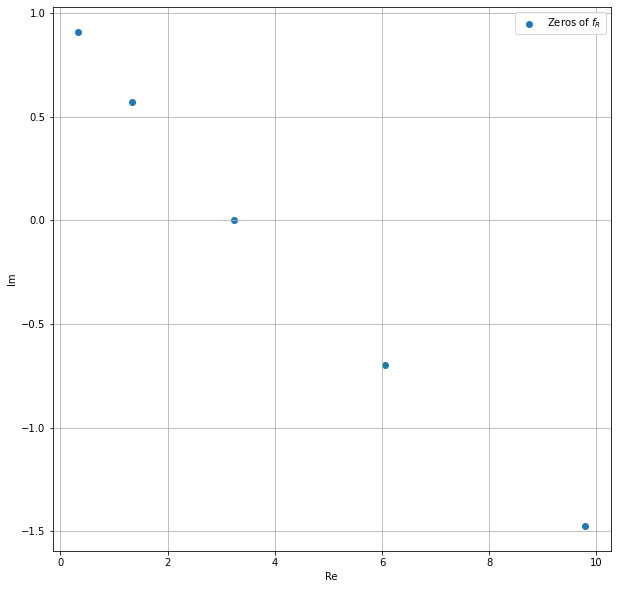

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(nbres).real,np.array(nbres).imag,label='Zeros of $f_R$')
plt.grid()
plt.legend()
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

## Two barriers

Similarly, the zeros in the upper and lower-half plane of the below function are the eigenvalue and resonances (resp.) of the Schr&ouml;dinger operator $ -d^2/dx^2 + i \gamma \chi_{R_0} + i \gamma \chi_{R} $ on the half-line endowed with a Dirichlet boundary condition at 0::
$$
f_{R_0,R}(z) = i\sqrt{z - i \gamma}\left[ e^{-2i\sqrt{z - i \gamma}(R - R_0)} - \frac{\sqrt{z} - \sqrt{z - i \gamma}}{\sqrt{z} + \sqrt{z - i \gamma}} \right] \sin ( \sqrt{z - 2 i \gamma } R_0 )
- \sqrt{z - 2 i \gamma} \left[ e^{-2 i \sqrt{z - i \gamma}(R - R_0)} + \frac{\sqrt{z} - \sqrt{z - i \gamma}}{\sqrt{z} + \sqrt{z - i \gamma}} \right] \cos(\sqrt{z - 2 i \gamma}R_0)
$$

In [9]:
gam = 1
R = 25
R_0 = 4.7
z = symbols('z')
fexpr = 1j*sqrt(z - 1j*gam)*(exp(-2*1j*sqrt(z - 1j*gam)*(R - R_0)) - (sqrt(z) - sqrt(z - 1j*gam))/(sqrt(z) + sqrt(z - 1j*gam)))*sin(sqrt(z - 2*1j*gam)*R_0)   \
 - sqrt(z - 2*1j*gam)*(exp(-2*1j*sqrt(z - 1j*gam)*(R - R_0)) + (sqrt(z) - sqrt(z - 1j*gam))/(sqrt(z) + sqrt(z - 1j*gam)))*cos(sqrt(z - 2*1j*gam)*R_0)
df = diff(fexpr,z)
g = lambdify(z,df/fexpr)
f = lambdify(z,fexpr)
def f2(x): return abs(f(x[0]+1j*x[1]))**2

In [10]:
t1 = time()
res = FindZeros(-1.5j+0.01,10,5,g,f2,minit = 10)
t2 = time()
print(t2 - t1)

13.23136830329895


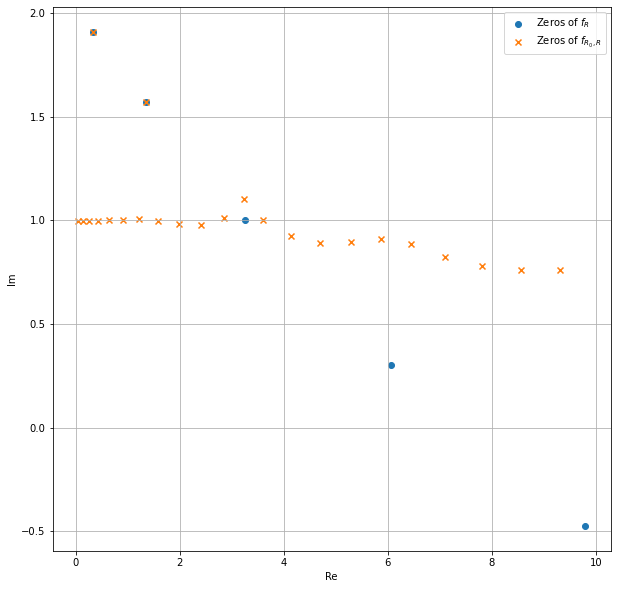

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(nbres).real,np.array(nbres).imag+1,label='Zeros of $f_R$')
plt.scatter(np.array(res).real,np.array(res).imag,marker = 'x',label='Zeros of $f_{R_0,R}$')
plt.grid()
plt.legend()
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()